## DSC-NUCLIO_E01_DataPreparation
### PROFESOR_AlbertoVacas PROJECT_BMWPricing GRUPO_03


### IMPORTAMOS LIBRERÍAS Y LEEMOS EL FICHERO


In [26]:
# IMPORTAMOS LIBRERÍAS NECESARIAS PARA EL ANÁLISIS
# pandas: para manipulación de datos
# numpy: para operaciones numéricas
# matplotlib y seaborn: para visualizaciones
# sklearn: para preprocesamiento de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Configuramos el estilo de las visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [27]:
# LEEMOS EL FICHERO DE BMW PRICING
# El dataset contiene información sobre vehículos BMW usados con sus características y precios

df_bmw = pd.read_csv("bmw_pricing.csv", sep=",")
df_bmw.head()


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


### PARTE 1: LIMPIEZA Y PREPARACIÓN DE DATOS


#### ANÁLISIS INICIAL DEL DATASET


In [28]:
# Obtenemos información general del dataset: tipos de datos, número de filas y columnas
# Esto nos ayuda a entender la estructura inicial de los datos

df_bmw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [29]:
# Verificamos la forma del dataset (número de filas y columnas)
print(f"Dimensiones del dataset: {df_bmw.shape}")


Dimensiones del dataset: (4843, 18)


#### PREGUNTA 1: ¿QUÉ VARIABLES TIENEN NULOS?


In [30]:
# Identificamos qué columnas tienen valores nulos y cuántos
# Esto es crucial para decidir cómo manejar los valores faltantes

df_bmw.isnull().sum()


marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [31]:
# Calculamos el porcentaje de nulos por columna para tener una mejor perspectiva
# Un porcentaje alto de nulos puede indicar que una columna no es útil para el análisis

porcentaje_nulos = (df_bmw.isnull().sum() / len(df_bmw)) * 100
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)
porcentaje_nulos


asientos_traseros_plegables    70.018584
fecha_registro                 50.030973
tipo_coche                     30.146603
marca                          20.028908
alerta_lim_velocidad           15.032005
bluetooth                      15.032005
aire_acondicionado             10.035102
color                           9.188520
precio                          0.123890
tipo_gasolina                   0.103242
volante_regulable               0.082593
modelo                          0.061945
elevalunas_electrico            0.041297
km                              0.041297
camara_trasera                  0.041297
potencia                        0.020648
fecha_venta                     0.020648
gps                             0.000000
dtype: float64

#### ELIMINACIÓN INICIAL DE COLUMNAS

**Decisión:** Antes de proceder con el análisis, debemos identificar columnas que no aportan valor o que tienen demasiados nulos


In [32]:
# Analizamos la columna 'marca'. Si todos los valores son BMW o nulos, no aporta información
# La mayoría de los registros deberían ser BMW, pero hay algunos nulos
print(df_bmw['marca'].value_counts(dropna=False))


marca
BMW    3873
NaN     970
Name: count, dtype: int64


In [33]:
# Analizamos 'asientos_traseros_plegables' que tiene más del 70% de nulos
# Esta columna tiene demasiados valores faltantes para ser útil
print(df_bmw['asientos_traseros_plegables'].value_counts(dropna=False))


asientos_traseros_plegables
NaN      3391
False    1150
True      302
Name: count, dtype: int64


In [34]:
# Creamos una copia del dataset para trabajar sin modificar el original
df_bmw_clean = df_bmw.copy()

# DECISIÓN: Eliminamos columnas que no aportan valor:
# 1. 'marca': Todos los coches son BMW (o deberían serlo), no aporta información discriminativa
# 2. 'asientos_traseros_plegables': Tiene más del 70% de nulos, no es útil para el modelo

columnas_eliminar = ['marca', 'asientos_traseros_plegables']
df_bmw_clean = df_bmw_clean.drop(columns=columnas_eliminar)
df_bmw_clean.shape


(4843, 16)

#### CONVERSIÓN DE FECHAS A FORMATO DATETIME


In [35]:
# Convertimos las columnas de fecha a formato datetime para poder trabajar con ellas

df_bmw_clean['fecha_registro'] = pd.to_datetime(df_bmw_clean['fecha_registro'], errors='coerce')
df_bmw_clean['fecha_venta'] = pd.to_datetime(df_bmw_clean['fecha_venta'], errors='coerce')

# Verificamos la conversión
df_bmw_clean[['fecha_registro', 'fecha_venta']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_registro  2420 non-null   datetime64[ns]
 1   fecha_venta     4842 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 75.8 KB


#### ELIMINACIÓN DE DUPLICADOS


In [36]:
# Identificamos registros duplicados
# Los duplicados pueden sesgar nuestro análisis y modelo

duplicados = df_bmw_clean.duplicated()
duplicados.sum()


np.int64(0)

In [37]:
# En el caso de tener duplicados los eliminaríamos y resetearíamos el índice
df_bmw_clean = df_bmw_clean.drop_duplicates().reset_index(drop=True)

# Luego podríamos calcular el número de registros eliminados
df_bmw.shape[0] - df_bmw_clean.shape[0]


0

#### CREACIÓN DE VARIABLES DERIVADAS


In [38]:
# Creamos una variable que puede ser útil para el modelo:
# 1. EDAD_VEHICULO: años desde el registro hasta la venta (puede ayudar a predecir precio)

# Calculamos la edad del vehículo en años al momento de la venta
df_bmw_clean['EDAD_VEHICULO'] = (df_bmw_clean['fecha_venta'] - df_bmw_clean['fecha_registro']).dt.days / 365

# Verificamos la nueva variable
df_bmw_clean['EDAD_VEHICULO'].describe()


count    2420.000000
mean        5.389322
std         2.528404
min        -5.504110
25%         4.079452
50%         4.838356
75%         5.835616
max        28.104110
Name: EDAD_VEHICULO, dtype: float64

#### PREGUNTA 2: MANEJO DE NULOS POR COLUMNA

Analizamos cada columna con nulos y decidimos la estrategia de imputación o eliminación.


In [39]:
# Revisamos nuevamente los nulos después de las transformaciones iniciales

nulos_actualizados = df_bmw_clean.isnull().sum()
nulos_actualizados = nulos_actualizados[nulos_actualizados > 0].sort_values(ascending=False)
nulos_actualizados


fecha_registro          2423
EDAD_VEHICULO           2423
tipo_coche              1460
bluetooth                728
alerta_lim_velocidad     728
aire_acondicionado       486
color                    445
precio                     6
tipo_gasolina              5
volante_regulable          4
modelo                     3
km                         2
elevalunas_electrico       2
camara_trasera             2
potencia                   1
fecha_venta                1
dtype: int64

**Estrategia para nulos por columna:**

1. **precio (target)**: Eliminaremos registros con precio nulo ya que no podemos predecir sin target
2. **modelo/km/potencia**: Son variables numéricas críticas. Tienen pocos nulos. Tiene sentido eliminar o imputar con mediana/moda según corresponda
3. **fecha_registro**: Tiene aprox 50% nulos. Tiene sentido crear variable binaria "fecha_registro_disponible" o imputar con mediana
4. **tipo_gasolina**: Imputaremos con moda (valor más frecuente)
5. **tipo_coche**: Tiene aprox 30% nulos. Tiene sentido imputar con moda o crear categoría "desconocido"
6. **color**: Tiene aprox 9% nulos. Tiene sentido imputar con moda o crear categoría "desconocido"
7. **VARIABLES BOOLEANAS**: bluetooth, alerta_lim_velocidad, aire_acondicionado, volante_regulable, camara_trasera, elevalunas_electrico. Estas variables tienen valores True/False/NaN. Tratamos NaN como False (ausencia de característica)
8. **gps**: Ya es booleano, verificamos que no tenga nulos
9. **fecha_venta**: Eliminamos si falta (es crítica y solo hay un valor nulo)
10. **fecha_registro**: Tiene aprox 50% nulos. Hay que pensar en una estrategia inteligente ya que
no podemos imputar media al 50% de los datos, ni eliminar el 50% de los registros




In [40]:
# 1. precio (target): Eliminamos registros sin precio
# No podemos usar registros sin precio para entrenar el modelo

print(f"Registros antes de eliminar nulos en precio: {len(df_bmw_clean)}")
df_bmw_clean = df_bmw_clean.dropna(subset=['precio'])
print(f"Registros despues: {len(df_bmw_clean)}")
print(f"Registros eliminados: {df_bmw.shape[0] - len(df_bmw_clean)}")


Registros antes de eliminar nulos en precio: 4843
Registros despues: 4837
Registros eliminados: 6


In [41]:
# 2. modelo, km, potencia
# Estas son variables importantes, eliminamos si faltan valores críticos

print("Nulos en variables numéricas críticas:")
print(f"modelo: {df_bmw_clean['modelo'].isnull().sum()}")
print(f"km: {df_bmw_clean['km'].isnull().sum()}")
print(f"potencia: {df_bmw_clean['potencia'].isnull().sum()}")

# Eliminamos registros sin modelo, km o potencia ya que són pocas
df_bmw_clean = df_bmw_clean.dropna(subset=['modelo', 'km', 'potencia'])
print(f"Registros después de eliminar nulos en variables críticas: {len(df_bmw_clean)}")


Nulos en variables numéricas críticas:
modelo: 3
km: 2
potencia: 1
Registros después de eliminar nulos en variables críticas: 4831


In [42]:
# 3. fecha_registro: Crear variable binaria y mantener nulos
# Como tiene muchos nulos (aprox 50%), creamos una variable indicadora
# Para EDAD_VEHICULO, los nulos se mantienen (serán NaN) y los trataremos después

df_bmw_clean['fecha_registro_disponible'] = df_bmw_clean['fecha_registro'].notna().astype(int)
df_bmw_clean['fecha_registro_disponible'].value_counts()

fecha_registro_disponible
1    2416
0    2415
Name: count, dtype: int64

In [43]:
# 4. tipo_gasolina: Imputamos con moda (valor más frecuente)
# Es una variable categórica importante

moda_tipo_gasolina = df_bmw_clean['tipo_gasolina'].mode()[0]
print(f"Moda de tipo_gasolina: {moda_tipo_gasolina}")
print(f"Nulos antes: {df_bmw_clean['tipo_gasolina'].isnull().sum()}")

df_bmw_clean['tipo_gasolina'] = df_bmw_clean['tipo_gasolina'].fillna(moda_tipo_gasolina)
print(f"Nulos despues: {df_bmw_clean['tipo_gasolina'].isnull().sum()}")


Moda de tipo_gasolina: diesel
Nulos antes: 5
Nulos despues: 0


In [44]:
# 5. tipo_coche: Imputar con moda o crear categoría "desconocido"
# Tiene aprox 30% de nulos, pero es una variable importante, 
# por lo que deicidimos crear categoría "desconocido" en lugar de imputar con moda

print(df_bmw_clean['tipo_coche'].value_counts(dropna=False))
df_bmw_clean['tipo_coche'] = df_bmw_clean['tipo_coche'].fillna('desconocido')

print(df_bmw_clean['tipo_coche'].value_counts(dropna=False))


tipo_coche
NaN            1455
estate         1103
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            75
convertible      30
van              28
Name: count, dtype: int64
tipo_coche
desconocido    1455
estate         1103
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            75
convertible      30
van              28
Name: count, dtype: int64


In [45]:
# 6. color: Imputar con moda o crear categoría "desconocido"
# Tiene aprox 9% nulos. Tiene sentido imputar con moda o crear categoría "desconocido"
# Decidimos crear categoría desconocido para mantener la información de que falta el dato

print(df_bmw_clean['color'].value_counts(dropna=False).head(10))
df_bmw_clean['color'] = df_bmw_clean['color'].fillna('desconocido')

print(df_bmw_clean['color'].value_counts(dropna=False).head(10))

color
black     1495
grey      1069
blue       643
white      483
NaN        444
brown      302
silver     291
red         47
beige       37
green       14
Name: count, dtype: int64
color
black          1495
grey           1069
blue            643
white           483
desconocido     444
brown           302
silver          291
red              47
beige            37
green            14
Name: count, dtype: int64


In [46]:
# 7. VARIABLES BOOLEANAS: bluetooth, alerta_lim_velocidad, aire_acondicionado, volante_regulable, camara_trasera, elevalunas_electrico
# Estas variables tienen valores True/False/NaN. Tratamos NaN como False (ausencia de característica)

variables_booleanas = ['bluetooth', 'alerta_lim_velocidad', 'aire_acondicionado', 'volante_regulable', 'camara_trasera', 'elevalunas_electrico']

for var in variables_booleanas:
    nulos_antes = df_bmw_clean[var].isnull().sum()
    
    # Convertimos a booleano: True/False se mantienen, NaN se convierte en False
    df_bmw_clean[var] = df_bmw_clean[var].fillna(False)

    # Aseguramos que sean booleanos
    df_bmw_clean[var] = df_bmw_clean[var].astype(bool)
    print(f"{var}: {nulos_antes} nulos imputados como False")


bluetooth: 727 nulos imputados como False
alerta_lim_velocidad: 727 nulos imputados como False
aire_acondicionado: 485 nulos imputados como False
volante_regulable: 4 nulos imputados como False
camara_trasera: 2 nulos imputados como False
elevalunas_electrico: 2 nulos imputados como False


/var/folders/5l/r6fc5n5s5k1dsgmfjbxysbxr0000gn/T/ipykernel_20518/4096203845.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw_clean[var] = df_bmw_clean[var].fillna(False)
/var/folders/5l/r6fc5n5s5k1dsgmfjbxysbxr0000gn/T/ipykernel_20518/4096203845.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw_clean[var] = df_bmw_clean[var].fillna(False)
/var/folders/5l/r6fc5n5s5k1dsgmfjbxysbxr0000gn/T/ipykernel_20518/4096203845.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future

In [47]:
# 8. gps: Ya es booleano, verificamos que no tenga nulos
print(df_bmw_clean['gps'].isnull().sum())
print(df_bmw_clean['gps'].dtype)


0
bool


In [48]:
# 9. fecha_venta: Eliminamos si falta (es crítica y solo hay un valor nulo)
df_bmw_clean = df_bmw_clean.dropna(subset=['fecha_venta'])
len(df_bmw_clean)


4830

In [49]:
# Verificamos el estado actual de los nulos
nulos_finales = df_bmw_clean.isnull().sum()

nulos_finales = nulos_finales[nulos_finales > 0]
if len(nulos_finales) > 0:
    print(nulos_finales)
    print ("A seguir con los nulos...")
else:
    print("El grupo 3 lo está petando")

fecha_registro    2414
EDAD_VEHICULO     2414
dtype: int64
A seguir con los nulos...


#### 10. IMPUTACIÓN DE fecha_registro USANDO KM Y USO PROMEDIO

**Estrategia:** Estimamos `fecha_registro` basándonos en la relación entre kilómetros recorridos y edad del vehículo.

**Lógica:**
1. Calculamos km/año promedio de vehículos con `fecha_registro` conocida
2. Estimamos `EDAD_VEHICULO` para los nulos: `km / promedio_km_año`
3. Back-calculamos `fecha_registro = fecha_venta - EDAD_VEHICULO`


In [ ]:
# PASO 1: Analizamos los registros CON fecha_registro para calcular km/año promedio

# Filtramos registros con fecha_registro válida
df_con_fecha = df_bmw_clean[df_bmw_clean['fecha_registro'].notna()].copy()

# Calculamos km por año para cada vehículo
df_con_fecha['km_por_año'] = df_con_fecha['km'] / df_con_fecha['EDAD_VEHICULO']

df_con_fecha['km_por_año'].describe()


count      2416.000000
mean      27542.344542
std       12452.094144
min     -205435.665025
25%       19721.037450
50%       26621.729221
75%       34726.700654
max      164438.516484
Name: km_por_año, dtype: float64

In [55]:
# PASO 2: Limpiamos valores atípicos para obtener un promedio de km_por_año más realista

# Eliminamos casos problemáticos:
# EDAD_VEHICULO <= 0 o muy alta (>25 años es poco común en coches usados)
# km_por_año muy bajo (<1000 km/año: coche casi no usado) o muy alto (>50000 km/año: uso extremo)

df_con_fecha_limpio = df_con_fecha[
    (df_con_fecha['EDAD_VEHICULO'] > 0) & 
    (df_con_fecha['EDAD_VEHICULO'] < 25) &
    (df_con_fecha['km_por_año'] > 1000) &
    (df_con_fecha['km_por_año'] < 50000)
].copy()

print(f"Registros eliminados: {len(df_con_fecha) - len(df_con_fecha_limpio)}")

print(df_con_fecha_limpio['km_por_año'].describe())

Registros eliminados: 66
count     2350.000000
mean     26862.580985
std      10069.970478
min       1198.558140
25%      19533.803271
50%      26292.735919
75%      34096.530883
max      49978.767967
Name: km_por_año, dtype: float64


In [66]:
# Calculamos mediana y media
km_por_año_mediana = df_con_fecha_limpio['km_por_año'].median()
km_por_año_media = df_con_fecha_limpio['km_por_año'].mean()

print(f"Mediana: {km_por_año_mediana:.0f} km/año")
print(f"Media: {km_por_año_media:.0f} km/año")

Mediana: 26293 km/año
Media: 26863 km/año


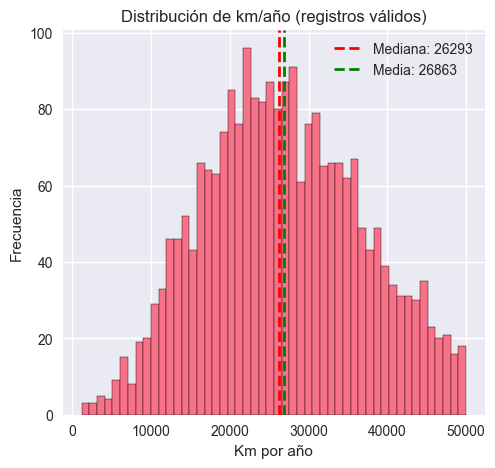

In [ ]:
# Visualizamos la distribución de km/año, usaremos la mediana por ser más robusta ante outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_con_fecha_limpio['km_por_año'], bins=50, edgecolor='black')
plt.axvline(km_por_año_mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana: {km_por_año_mediana:.0f}')
plt.axvline(km_por_año_media, color='green', linestyle='--', linewidth=2, label=f'Media: {km_por_año_media:.0f}')
plt.xlabel('Km por año')
plt.ylabel('Frecuencia')
plt.title('Distribución de km/año (registros válidos)')
plt.legend()

In [ ]:
# PASO 3: Imputamos fecha_registro para los registros SIN fecha

# Identificamos registros sin fecha_registro
df_sin_fecha_mask = df_bmw_clean['fecha_registro'].isna()
n_sin_fecha = df_sin_fecha_mask.sum()

print(f"Registros sin fecha_registro: {n_sin_fecha}")
print(f"Porcentaje: {(n_sin_fecha / len(df_bmw_clean)) * 100:.1f}%")


Registros sin fecha_registro: 2414
Porcentaje: 50.0%


In [ ]:
# Para estos registros:
# 1. Estimamos EDAD_VEHICULO = km / km_por_año_mediana
# 2. Calculamos fecha_registro = fecha_venta - EDAD_VEHICULO (en días)

# Calculamos EDAD_VEHICULO estimada
edad_estimada = df_bmw_clean.loc[df_sin_fecha_mask, 'km'] / km_por_año_mediana
print(edad_estimada)

1       0.529766
3       4.869596
4       3.692921
6       7.805160
8       4.711796
          ...   
4834    1.817308
4835    6.302387
4837    2.539485
4838    1.511558
4842    7.448445
Name: km, Length: 2414, dtype: float64


In [83]:
# Actualizamos EDAD_VEHICULO
df_bmw_clean.loc[df_sin_fecha_mask, 'EDAD_VEHICULO'] = edad_estimada

# Calculamos fecha_registro: restamos EDAD_VEHICULO (en días) a fecha_venta
df_bmw_clean.loc[df_sin_fecha_mask, 'fecha_registro'] = (
    df_bmw_clean.loc[df_sin_fecha_mask, 'fecha_venta'] - 
    pd.to_timedelta(edad_estimada * 365, unit='days')
)


In [86]:
# Verificación

print(f"Nulos en fecha_registro DESPUÉS: {df_bmw_clean['fecha_registro'].isna().sum()}")
print(f"Nulos en EDAD_VEHICULO DESPUÉS: {df_bmw_clean['EDAD_VEHICULO'].isna().sum()}")
print(df_bmw_clean['EDAD_VEHICULO'].describe())


Nulos en fecha_registro DESPUÉS: 0
Nulos en EDAD_VEHICULO DESPUÉS: 0
count    4830.000000
mean        5.379602
std         2.416816
min        -5.504110
25%         4.002740
50%         5.041716
75%         6.260484
max        28.104110
Name: EDAD_VEHICULO, dtype: float64


Estadísticas comparativas:
Registros ORIGINALES (con fecha_registro)
count    2416.000000
mean        5.390722
std         2.530188
min        -5.504110
25%         4.079452
50%         4.841096
75%         5.835616
max        28.104110
Name: EDAD_VEHICULO, dtype: float64
Registros IMPUTADOS (sin fecha_registro)
count    2414.000000
mean        5.368473
std         2.298228
min        -0.002434
25%         3.869928
50%         5.334819
75%         6.655526
max        18.163610
Name: EDAD_VEHICULO, dtype: float64


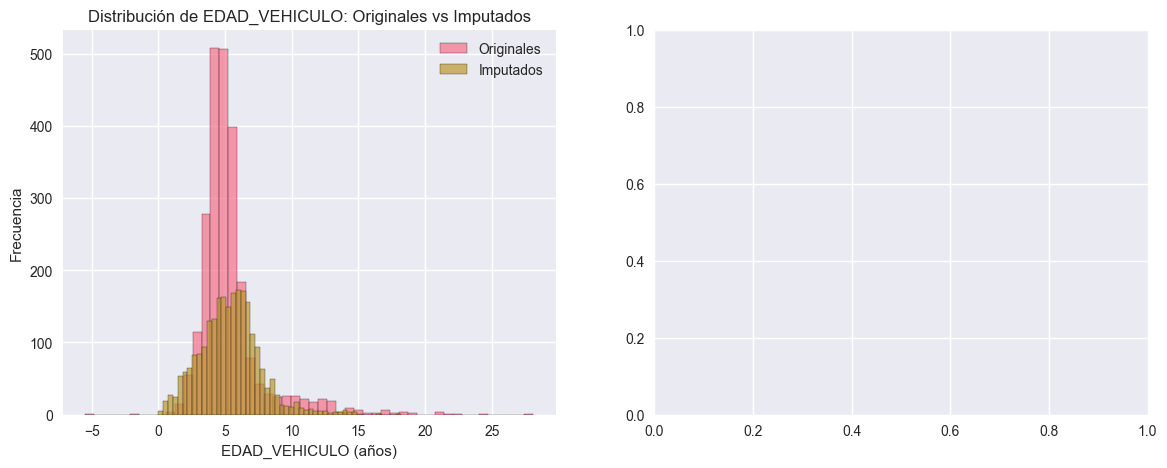

In [99]:
# PASO 4: Visualizamos el resultado de la imputación

# Comparamos la distribución de EDAD_VEHICULO antes y después
fig, axes = plt.subplots(1,2, figsize=(14, 5))

# Distribución de EDAD_VEHICULO (solo registros originales con fecha)
df_originales = df_bmw_clean[df_bmw_clean['fecha_registro_disponible'] == 1]
df_imputados = df_bmw_clean[df_bmw_clean['fecha_registro_disponible'] == 0]

axes[0].hist(df_originales['EDAD_VEHICULO'], bins=50, alpha=0.7, label='Originales', edgecolor='black')
axes[0].hist(df_imputados['EDAD_VEHICULO'], bins=50, alpha=0.7, label='Imputados', edgecolor='black')
axes[0].set_xlabel('EDAD_VEHICULO (años)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de EDAD_VEHICULO: Originales vs Imputados')
axes[0].legend()

print(f"Estadísticas comparativas:")
print("Registros ORIGINALES (con fecha_registro)")
print(df_originales['EDAD_VEHICULO'].describe())
print("Registros IMPUTADOS (sin fecha_registro)")
print(df_imputados['EDAD_VEHICULO'].describe())


In [92]:
# Verificamos el estado final de los nulos (ACTUALIZADO)
nulos_finales = df_bmw_clean.isnull().sum()

nulos_finales = nulos_finales[nulos_finales > 0]
if len(nulos_finales) > 0:
    print(nulos_finales)
    print("A seguir con los nulos...")
else:
    print("NO HAY NULOS EN EL DATASET!")
    print("El grupo 3 lo está petando")


NO HAY NULOS EN EL DATASET!
El grupo 3 lo está petando


In [93]:
df_bmw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4830 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   modelo                     4830 non-null   object        
 1   km                         4830 non-null   float64       
 2   potencia                   4830 non-null   float64       
 3   fecha_registro             4830 non-null   datetime64[ns]
 4   tipo_gasolina              4830 non-null   object        
 5   color                      4830 non-null   object        
 6   tipo_coche                 4830 non-null   object        
 7   volante_regulable          4830 non-null   bool          
 8   aire_acondicionado         4830 non-null   bool          
 9   camara_trasera             4830 non-null   bool          
 10  elevalunas_electrico       4830 non-null   bool          
 11  bluetooth                  4830 non-null   bool          
 12  gps        

**RESUMEN DE LA IMPUTACIÓN:**

Hemos imputado `fecha_registro` exitosamente usando la estrategia de **km/año promedio**:

1. **Calculamos** el uso promedio (km/año) de vehículos con fecha_registro conocida
2. **Limpiamos** outliers para obtener un promedio realista
3. **Estimamos** EDAD_VEHICULO para nulos: `km / km_por_año_mediana`
4. **Back-calculamos** fecha_registro: `fecha_venta - EDAD_VEHICULO`

**Ventajas de este método:**
- Usa información real del vehículo (km recorridos)
- Mantiene la relación lógica entre variables
- No requiere eliminar el 50% de los registros
- Preserva la variabilidad natural de los datos

**Nota:** La variable `fecha_registro_disponible` se mantiene como indicador de si el valor era original o imputado, lo cual puede ser útil para el modelo.


#### ANÁLISIS Y LIMPIEZA DE OUTLIERS


In [ ]:
# Analizamos outliers en la variable target (precio)
# Los outliers pueden afectar significativamente el modelo

print("Estadísticas descriptivas de PRECIO:")
print(df_bmw_clean['precio'].describe())

# Visualizamos la distribución del precio
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_bmw_clean['precio'].hist(bins=50)
plt.title('Distribución de Precio')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_bmw_clean['precio'])
plt.title('Boxplot de Precio')
plt.ylabel('Precio (€)')

plt.tight_layout()
plt.show()


In [ ]:
# Identificamos y tratamos outliers en precio usando el método IQR
# Eliminamos precios <= 0 (no tienen sentido) y valores extremos

# Eliminamos precios <= 0
print(f"Registros con precio <= 0: {(df_bmw_clean['precio'] <= 0).sum()}")
df_bmw_clean = df_bmw_clean[df_bmw_clean['precio'] > 0]

# Método IQR para outliers superiores
Q1 = df_bmw_clean['precio'].quantile(0.25)
Q3 = df_bmw_clean['precio'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"\nLímites IQR:")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")

outliers_inferiores = (df_bmw_clean['precio'] < limite_inferior).sum()
outliers_superiores = (df_bmw_clean['precio'] > limite_superior).sum()

print(f"\nOutliers inferiores: {outliers_inferiores}")
print(f"Outliers superiores: {outliers_superiores}")

# DECISIÓN: Para precios, los outliers superiores pueden ser válidos (coches de lujo)
# Solo eliminamos outliers inferiores (precios anormalmente bajos)
df_bmw_clean = df_bmw_clean[df_bmw_clean['precio'] >= limite_inferior]
print(f"\nRegistros después de eliminar outliers inferiores: {len(df_bmw_clean)}")


In [ ]:
# Analizamos outliers en otras variables numéricas: km, potencia, EDAD_VEHICULO

variables_numericas = ['km', 'potencia', 'EDAD_VEHICULO']

for var in variables_numericas:
    print(f"\n=== Análisis de {var} ===")
    print(df_bmw_clean[var].describe())
    
    # Eliminamos valores negativos si los hay (no tienen sentido)
    if (df_bmw_clean[var] < 0).any():
        print(f"Valores negativos encontrados: {(df_bmw_clean[var] < 0).sum()}")
        df_bmw_clean = df_bmw_clean[df_bmw_clean[var] >= 0]
    
    # Para km y potencia, eliminamos valores extremos superiores (pueden ser errores)
    if var in ['km', 'potencia']:
        Q1 = df_bmw_clean[var].quantile(0.25)
        Q3 = df_bmw_clean[var].quantile(0.75)
        IQR = Q3 - Q1
        limite_superior = Q3 + 3 * IQR  # Usamos 3*IQR para ser menos restrictivos
        
        outliers = (df_bmw_clean[var] > limite_superior).sum()
        print(f"Outliers superiores (> Q3 + 3*IQR): {outliers}")
        
        # Solo eliminamos si hay muchos outliers (más del 1%)
        if outliers > len(df_bmw_clean) * 0.01:
            df_bmw_clean = df_bmw_clean[df_bmw_clean[var] <= limite_superior]
            print(f"Eliminados {outliers} outliers")
    
    print(f"Registros restantes: {len(df_bmw_clean)}")


#### GUARDAMOS EL DATASET LIMPIO


In [ ]:
# Guardamos el dataset limpio en formato pickle para uso posterior
df_bmw_clean.to_pickle("df_bmw_clean.pkl")

print(f"Dataset guardado. Dimensiones finales: {df_bmw_clean.shape}")
print(f"Registros originales: {df_bmw.shape[0]}")
print(f"Registros finales: {df_bmw_clean.shape[0]}")
print(f"Registros eliminados: {df_bmw.shape[0] - df_bmw_clean.shape[0]}")


#### LEEMOS EL DATASET LIMPIO


In [ ]:
# Leemos el dataset limpio
df_bmw_clean = pd.read_pickle("df_bmw_clean.pkl")
df_bmw_clean.head()


#### PREGUNTA 3: ANÁLISIS UNIVARIABLE

Analizamos cada variable individualmente para entender su distribución y encontrar información interesante.


In [ ]:
# ANÁLISIS DE VARIABLES NUMÉRICAS

variables_numericas = ['km', 'potencia', 'precio', 'EDAD_VEHICULO']

for var in variables_numericas:
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE {var.upper()}")
    print(f"{'='*50}")
    print(df_bmw_clean[var].describe())
    
    # Visualizaciones
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histograma
    axes[0].hist(df_bmw_clean[var].dropna(), bins=50, edgecolor='black')
    axes[0].set_title(f'Distribución de {var}')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frecuencia')
    
    # Boxplot
    axes[1].boxplot(df_bmw_clean[var].dropna())
    axes[1].set_title(f'Boxplot de {var}')
    axes[1].set_ylabel(var)
    
    plt.tight_layout()
    plt.show()
    
    # Información interesante
    if var == 'precio':
        print(f"\n💡 INSIGHT: El precio medio es {df_bmw_clean[var].mean():.2f}€")
        print(f"   El precio mediano es {df_bmw_clean[var].median():.2f}€")
        print(f"   La diferencia entre media y mediana sugiere una distribución sesgada")
    elif var == 'km':
        print(f"\n💡 INSIGHT: Los coches tienen en promedio {df_bmw_clean[var].mean():.0f} km")
        print(f"   El rango va desde {df_bmw_clean[var].min():.0f} hasta {df_bmw_clean[var].max():.0f} km")
    elif var == 'potencia':
        print(f"\n💡 INSIGHT: La potencia media es {df_bmw_clean[var].mean():.1f} CV")
        print(f"   Potencia mínima: {df_bmw_clean[var].min():.0f} CV, máxima: {df_bmw_clean[var].max():.0f} CV")


In [ ]:
# ANÁLISIS DE VARIABLES CATEGÓRICAS

variables_categoricas = ['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

for var in variables_categoricas:
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DE {var.upper()}")
    print(f"{'='*50}")
    
    value_counts = df_bmw_clean[var].value_counts()
    print(f"\nTop 10 valores más frecuentes:")
    print(value_counts.head(10))
    
    print(f"\nNúmero de categorías únicas: {df_bmw_clean[var].nunique()}")
    print(f"Porcentaje del valor más frecuente: {(value_counts.iloc[0] / len(df_bmw_clean)) * 100:.2f}%")
    
    # Visualización
    plt.figure(figsize=(12, 6))
    if df_bmw_clean[var].nunique() > 20:
        # Si hay muchas categorías, mostramos solo las top 15
        top_values = value_counts.head(15)
        top_values.plot(kind='bar')
        plt.title(f'Top 15 valores más frecuentes en {var}')
    else:
        value_counts.plot(kind='bar')
        plt.title(f'Distribución de {var}')
    
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Insights
    if var == 'modelo':
        print(f"\n💡 INSIGHT: El modelo más común es '{value_counts.index[0]}' con {value_counts.iloc[0]} unidades")
    elif var == 'tipo_gasolina':
        print(f"\n💡 INSIGHT: {value_counts.index[0]} es el tipo de combustible más común")
        print(f"   Distribución: {dict(value_counts)}")
    elif var == 'color':
        print(f"\n💡 INSIGHT: El color más popular es '{value_counts.index[0]}'")


In [ ]:
# ANÁLISIS DE VARIABLES BOOLEANAS

variables_booleanas = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 
                       'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']

print("Distribución de variables booleanas:")
print("="*60)

for var in variables_booleanas:
    value_counts = df_bmw_clean[var].value_counts()
    porcentaje_true = (value_counts.get(True, 0) / len(df_bmw_clean)) * 100
    print(f"\n{var}:")
    print(f"  True: {value_counts.get(True, 0)} ({porcentaje_true:.1f}%)")
    print(f"  False: {value_counts.get(False, 0)} ({100-porcentaje_true:.1f}%)")

# Visualización
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables_booleanas):
    value_counts = df_bmw_clean[var].value_counts()
    axes[i].bar(value_counts.index.astype(str), value_counts.values)
    axes[i].set_title(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### PREGUNTA 4: ANÁLISIS DE CORRELACIÓN INICIAL

Identificamos variables correlacionadas que podrían causar multicolinealidad en el modelo.


In [ ]:
# Calculamos la matriz de correlación solo para variables numéricas
# La correlación mide la relación lineal entre variables

variables_numericas_corr = ['km', 'potencia', 'precio', 'EDAD_VEHICULO', 'fecha_registro_disponible']
corr = df_bmw_clean[variables_numericas_corr].corr()

print("Matriz de correlación (variables numéricas):")
print(corr)

# Visualización con mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()


In [ ]:
# Identificamos pares de variables con alta correlación (|r| > 0.7)
# Estas variables pueden causar multicolinealidad

print("Pares de variables con correlación alta (|r| > 0.7):")
print("="*60)

# Obtenemos el triángulo superior de la matriz (sin la diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
corr_triangulo = corr.where(mask)

# Buscamos correlaciones altas
for i in range(len(corr_triangulo.columns)):
    for j in range(i+1, len(corr_triangulo.columns)):
        valor = corr_triangulo.iloc[i, j]
        if not np.isnan(valor) and abs(valor) > 0.7:
            var1 = corr_triangulo.columns[i]
            var2 = corr_triangulo.columns[j]
            print(f"{var1} - {var2}: {valor:.3f}")

# Si no hay correlaciones altas
if corr_triangulo.abs().max().max() <= 0.7:
    print("No se encontraron correlaciones altas (|r| > 0.7) entre variables numéricas")
    print(f"Correlación máxima: {corr_triangulo.abs().max().max():.3f}")


#### PREGUNTA 5: ANÁLISIS VARIABLE VS TARGET

Analizamos la relación entre cada variable y el precio (target) para identificar insights interesantes.


In [ ]:
# ANÁLISIS: Variables numéricas vs Precio

variables_numericas_vs_target = ['km', 'potencia', 'EDAD_VEHICULO']

for var in variables_numericas_vs_target:
    print(f"\n{'='*50}")
    print(f"ANÁLISIS: {var.upper()} vs PRECIO")
    print(f"{'='*50}")
    
    # Correlación
    correlacion = df_bmw_clean[var].corr(df_bmw_clean['precio'])
    print(f"Correlación con precio: {correlacion:.3f}")
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scatter plot
    axes[0].scatter(df_bmw_clean[var], df_bmw_clean['precio'], alpha=0.5)
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Precio (€)')
    axes[0].set_title(f'{var} vs Precio')
    
    # Boxplot por cuartiles
    df_bmw_clean[f'{var}_quartile'] = pd.qcut(df_bmw_clean[var], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
    sns.boxplot(data=df_bmw_clean, x=f'{var}_quartile', y='precio', ax=axes[1])
    axes[1].set_title(f'Precio por cuartiles de {var}')
    axes[1].set_xlabel(f'{var} (cuartiles)')
    axes[1].set_ylabel('Precio (€)')
    
    plt.tight_layout()
    plt.show()
    
    # Eliminamos la columna temporal
    df_bmw_clean.drop(columns=[f'{var}_quartile'], inplace=True)
    
    # Insight
    if abs(correlacion) > 0.3:
        direccion = "positiva" if correlacion > 0 else "negativa"
        print(f"\n💡 INSIGHT: Correlación {direccion} moderada/alta ({correlacion:.3f})")
        if var == 'km':
            print("   A mayor kilometraje, menor precio (correlación negativa esperada)")
        elif var == 'potencia':
            print("   A mayor potencia, mayor precio (correlación positiva esperada)")
    else:
        print(f"\n💡 INSIGHT: Correlación débil con precio ({correlacion:.3f})")


In [ ]:
# ANÁLISIS: Variables categóricas vs Precio

variables_categoricas_vs_target = ['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

for var in variables_categoricas_vs_target:
    print(f"\n{'='*50}")
    print(f"ANÁLISIS: {var.upper()} vs PRECIO")
    print(f"{'='*50}")
    
    # Estadísticas por categoría
    stats_por_categoria = df_bmw_clean.groupby(var)['precio'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
    print(f"\nPrecio medio por categoría (top 10):")
    print(stats_por_categoria.head(10))
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Violin plot (si hay pocas categorías) o boxplot
    if df_bmw_clean[var].nunique() <= 15:
        # Violin plot para ver distribución
        top_categorias = stats_por_categoria.head(10).index
        df_top = df_bmw_clean[df_bmw_clean[var].isin(top_categorias)]
        sns.violinplot(data=df_top, x=var, y='precio', ax=axes[0])
        axes[0].set_title(f'Distribución de Precio por {var} (Top 10)')
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
    else:
        # Boxplot para muchas categorías
        top_categorias = stats_por_categoria.head(10).index
        df_top = df_bmw_clean[df_bmw_clean[var].isin(top_categorias)]
        sns.boxplot(data=df_top, x=var, y='precio', ax=axes[0])
        axes[0].set_title(f'Precio por {var} (Top 10)')
        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
    
    # Precio medio por categoría
    top_10_mean = stats_por_categoria.head(10)
    top_10_mean['mean'].plot(kind='bar', ax=axes[1])
    axes[1].set_title(f'Precio Medio por {var} (Top 10)')
    axes[1].set_xlabel(var)
    axes[1].set_ylabel('Precio Medio (€)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Insight
    categoria_mas_cara = stats_por_categoria.index[0]
    categoria_mas_barata = stats_por_categoria.index[-1]
    diferencia = stats_por_categoria.loc[categoria_mas_cara, 'mean'] - stats_por_categoria.loc[categoria_mas_barata, 'mean']
    
    print(f"\n💡 INSIGHT:")
    print(f"   Categoría más cara: {categoria_mas_cara} (precio medio: {stats_por_categoria.loc[categoria_mas_cara, 'mean']:.2f}€)")
    print(f"   Categoría más barata: {categoria_mas_barata} (precio medio: {stats_por_categoria.loc[categoria_mas_barata, 'mean']:.2f}€)")
    print(f"   Diferencia: {diferencia:.2f}€")


In [ ]:
# ANÁLISIS: Variables booleanas vs Precio

variables_booleanas_vs_target = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 
                                  'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']

print("Impacto de características booleanas en el precio:")
print("="*60)

for var in variables_booleanas_vs_target:
    stats = df_bmw_clean.groupby(var)['precio'].agg(['mean', 'median', 'count'])
    diferencia = stats.loc[True, 'mean'] - stats.loc[False, 'mean']
    porcentaje_diferencia = (diferencia / stats.loc[False, 'mean']) * 100
    
    print(f"\n{var}:")
    print(f"  Con {var}: {stats.loc[True, 'mean']:.2f}€ (n={stats.loc[True, 'count']})")
    print(f"  Sin {var}: {stats.loc[False, 'mean']:.2f}€ (n={stats.loc[False, 'count']})")
    print(f"  Diferencia: {diferencia:+.2f}€ ({porcentaje_diferencia:+.1f}%)")

# Visualización
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variables_booleanas_vs_target):
    sns.boxplot(data=df_bmw_clean, x=var, y='precio', ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Precio (€)')

plt.tight_layout()
plt.show()


#### PREGUNTA 6: TRANSFORMACIÓN DE VARIABLES

Identificamos qué variables categóricas necesitan transformación y qué técnica usar.


In [ ]:
# Identificamos el tipo de cada variable para decidir la transformación adecuada

target = ['precio']  # Variable objetivo

def obtener_lista_variables(dataset, target):
    """
    Clasifica las variables en numéricas, booleanas y categóricas.
    """
    lista_numericas = []
    lista_boolean = []
    lista_categoricas = []
    
    for col in dataset.columns:
        if col in target:
            continue
        
        # Variables numéricas (float o int) con más de 2 valores únicos
        if dataset[col].dtype.kind in ('f', 'i') and len(dataset[col].unique()) > 2:
            lista_numericas.append(col)
        # Variables booleanas (bool o con solo 2 valores únicos)
        elif dataset[col].dtype == bool or (dataset[col].dtype.kind in ('f', 'i', 'O') and len(dataset[col].unique()) == 2):
            lista_boolean.append(col)
        # Variables categóricas (object o con pocos valores únicos)
        elif dataset[col].dtype.kind == 'O':
            lista_categoricas.append(col)
        # Variables datetime no se incluyen directamente
    
    return lista_numericas, lista_boolean, lista_categoricas

lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_bmw_clean, target)

print("Clasificación de variables:")
print("="*60)
print(f"\nVariables NUMÉRICAS ({len(lista_numericas)}):")
for var in lista_numericas:
    print(f"  - {var}")

print(f"\nVariables BOOLEANAS ({len(lista_boolean)}):")
for var in lista_boolean:
    print(f"  - {var}")

print(f"\nVariables CATEGÓRICAS ({len(lista_categoricas)}):")
for var in lista_categoricas:
    n_categorias = df_bmw_clean[var].nunique()
    print(f"  - {var} ({n_categorias} categorías)")


In [ ]:
# Analizamos las variables categóricas para decidir la técnica de encoding

print("Análisis de variables categóricas para encoding:")
print("="*60)

for var in lista_categoricas:
    n_categorias = df_bmw_clean[var].nunique()
    distribucion = df_bmw_clean[var].value_counts()
    
    print(f"\n{var}:")
    print(f"  Número de categorías: {n_categorias}")
    print(f"  Top 5 categorías:")
    for cat, count in distribucion.head(5).items():
        porcentaje = (count / len(df_bmw_clean)) * 100
        print(f"    - {cat}: {count} ({porcentaje:.1f}%)")
    
    # Decisión de técnica
    if n_categorias <= 10:
        print(f"  → TÉCNICA: One-Hot Encoding (OHE) - pocas categorías")
    else:
        print(f"  → TÉCNICA: One-Hot Encoding (OHE) o Target Encoding - muchas categorías")
        print(f"    Considerar agrupar categorías poco frecuentes si hay muchas")


In [ ]:
# Aplicamos One-Hot Encoding a las variables categóricas
# OHE crea una columna binaria para cada categoría

print("Aplicando One-Hot Encoding a variables categóricas...")
print(f"Variables a transformar: {lista_categoricas}")

df_bmw_prep = pd.get_dummies(data=df_bmw_clean, columns=lista_categoricas, dtype=int)

print(f"\nDimensiones antes de OHE: {df_bmw_clean.shape}")
print(f"Dimensiones después de OHE: {df_bmw_prep.shape}")
print(f"Columnas nuevas creadas: {df_bmw_prep.shape[1] - df_bmw_clean.shape[1]}")

# Mostramos algunas columnas nuevas
print(f"\nEjemplo de columnas nuevas (primeras 10):")
nuevas_columnas = [col for col in df_bmw_prep.columns if col not in df_bmw_clean.columns]
print(nuevas_columnas[:10])


In [ ]:
# Normalizamos las variables numéricas usando MinMaxScaler
# MinMaxScaler escala los valores al rango [0, 1]
# Esto es importante para algoritmos que son sensibles a la escala

print("Normalizando variables numéricas con MinMaxScaler...")
print(f"Variables a normalizar: {lista_numericas}")

# Creamos el scaler
scaler = MinMaxScaler()

# Aplicamos la normalización
df_bmw_prep[lista_numericas] = scaler.fit_transform(df_bmw_prep[lista_numericas])

print("\nVerificación de la normalización:")
print(df_bmw_prep[lista_numericas].describe())

# Verificamos que los valores estén en el rango [0, 1]
print(f"\nRango de valores después de normalización:")
for var in lista_numericas:
    min_val = df_bmw_prep[var].min()
    max_val = df_bmw_prep[var].max()
    print(f"  {var}: [{min_val:.3f}, {max_val:.3f}]")


In [ ]:
# Verificamos el estado final del dataset preparado
print("Estado final del dataset preparado:")
print("="*60)
print(f"Dimensiones: {df_bmw_prep.shape}")
print(f"\nTipos de datos:")
print(df_bmw_prep.dtypes.value_counts())

print(f"\nPrimeras filas:")
df_bmw_prep.head()


#### GUARDAMOS EL DATASET PREPROCESADO


In [ ]:
# Guardamos el dataset preprocesado
df_bmw_prep.to_pickle("dataset_bmw_preprocesado.pkl")

print("Dataset preprocesado guardado exitosamente.")
print(f"Dimensiones finales: {df_bmw_prep.shape}")
